# Data Wrangling of WeRateDogs

The dataset that we will be wrangling (and analyzing and visualizing) the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. Data is received from:
* The already downloaded file twitter-archive-enhanced.csv, containing ratings and comments of the tweets
* The file image_predictions, hosted on udacitys server. It contains precdictions of which breed a dog is
* The official twitter API, which is used to download Json data. This data stores for each tweet besides other data: ID, retweet count, and favorite count

Only tweets until August 1st, 2017 are used, since beyond this date there are no  image predictions  available
The total Data Wrangling process consists of following steps:
1. Data Gathering
2. Data Assessing
3. Data Cleaning
    * Define
    * Code
    * Test
4. Data Analysis

## Data Gathering
As already told, in this step the data of three sources is gathered, using different methods.

### Archiv Data
To get the data saved in the twitter-archive-enhanced.xls, we use the built in functionality of pandas.

In [1]:
# Import pandas library
import pandas as pd

In [176]:
# Read in data of .csv file
df_archiv = pd.read_csv('twitter-archive-enhanced.csv')

In [342]:
df_archiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df_archiv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Prediction Data
To get the data from the udacity server, we download it programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:
# Import library
import requests
import os

In [ ]:
# Get the data from the server
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [ ]:
# Check,whether response is valid
response.status_code

In [8]:
# Check, what kind of content the data is
response.headers['Content-Type']

In [9]:
# Save data
filename = 'image_predictions.tsv'
with open(filename,mode = 'wb') as file:
    file.write(response.content)

In [10]:
# Read in .tsv file
df_img_pred = pd.read_csv('image_predictions.tsv', sep='\t')

In [11]:
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API Data

Now its time to get the data available through the twitter API. For this we use the libary tweepy. Our acess keys and tokens are exclude due to safety. 

In [12]:
import tweepy
import json
import time

Below the data, we need for the twitter API acess is normally initialized. As mentioned, I do not display them.

In [365]:
# Insert your keys/token for the twitter API
#consumer_key =
#consumer_secret =
#access_token = 
#access_token_secret =

In [14]:
# Create api object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [16]:
# Get tweet ids from .txt file and use the API to get the .json data belonging to each tweet id. Finally save 
#the .json data to a file
tweepy_errors = {}
filename = 'tweet_json.txt'
start = time.time()

for tweet_id in tweet_ids:
    print
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_json = tweet._json
        with open(filename, 'a') as file:
            json.dump(tweet_json, file)
            file.write('\n')
        print('Collected Tweet:     {tweet_id}           Time passed:          {passed_time}s'.format(tweet_id = tweet_id, passed_time = time.time()-start))
    except tweepy.TweepError as tweepy_error:
        print('Tweet with id {tweet_id} was deleted'.format(tweet_id = tweet_id))
        tweepy_errors[tweet_id] = tweepy_error

"\ntweepy_errors = {}\nfilename = 'tweet_json.txt'\nstart = time.time()\n\nfor tweet_id in tweet_ids:\n    print\n    try:\n        tweet = api.get_status(tweet_id, tweet_mode='extended')\n        tweet_json = tweet._json\n        with open(filename, 'a') as file:\n            json.dump(tweet_json, file)\n            file.write('\n')\n        print('Collected Tweet:     {tweet_id}           Time passed:          {passed_time}s'.format(tweet_id = tweet_id, passed_time = time.time()-start))\n    except tweepy.TweepError as tweepy_error:\n        print('Tweet with id {tweet_id} was deleted'.format(tweet_id = tweet_id))\n        tweepy_errors[tweet_id] = tweepy_error\n"

In [17]:
# Read the .json file and excerp tweet id, retweet count and favorite count save those informations in lists
tweet_ids = []
retweet_counts = []
favorite_counts = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_ids.append(tweet['id'])
        retweet_counts.append(tweet['retweet_count'])
        favorite_counts.append(tweet['favorite_count'])      

In [18]:
# Create the dataframe out of those lists
df_api = pd.DataFrame(data = {'tweet_id' : tweet_ids, 
                      'retweet_count' : retweet_counts,
                     'favorite_count' : favorite_counts})

In [19]:
#Show dataframe
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7288,34775
1,892177421306343426,5446,30141
2,891815181378084864,3588,22684
3,891689557279858688,7481,38057
4,891327558926688256,8034,36342
...,...,...,...
2326,666049248165822465,37,92
2327,666044226329800704,120,256
2328,666033412701032449,38,105
2329,666029285002620928,41,117


## Data Assessment
In this chapter the the data we gathered will be assessed. We try to identify quality and tidiness issues, which we will clean later.

### Archiv Data

Assessing the archiv data, we try to get an overlook over the data at first.

In [20]:
df_archiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
df_archiv.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
656,791780927877898241,NaN,NaN,2016-10-27 23:17:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maddie. She gets some w...,7.467577e+17,4.196984e+09,2016-06-25 17:31:25 +0000,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/...",11,10,Maddie,None,None,None,None
787,774639387460112384,NaN,NaN,2016-09-10 16:03:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprinkles. He's trapped in light jail....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774639387...,10,10,Sprinkles,None,None,None,None
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
1674,682259524040966145,NaN,NaN,2015-12-30 17:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682259524...,9,10,Jax,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1010,747461612269887489,NaN,NaN,2016-06-27 16:08:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen a shark hold another shark like thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747461612...,10,10,None,None,None,None,None
1622,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684914660...,12,10,None,None,None,None,None
587,799757965289017345,NaN,NaN,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,None,None,None
962,750868782890057730,NaN,NaN,2016-07-07 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo. He hauled ass until he ran out of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750868782...,11,10,Milo,None,None,pupper,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,None,None,None,None


In [22]:
df_archiv.duplicated().sum()

0

Most of the columns, that are in the dataframe, are self explaining. Here is the meaning of those columns, that need a closer look:
* in_reply_to_status_id: not null, if the tweet is a reply. The field contains the id of the original tweet
* in_reply_to_user_id: not null, if the tweet is a reply. The field contains the id of the author of the original tweet
* retweeted_status_id: not null, if the tweet is a retweet. This field contatins the id of the original tweet
* retweeted_status_user_id: not null, if the tweet is a retweet. This field contains the id of author of the original tweet
* expanded_url: url of the tweet

In the following, the issues related to this dataframe are outlined.

#### Quality: There are retweets included
__Note:__
    Since we only look at original tweets, we can exclude all tweets that are either retweets or replies. There are 181 retweets.

#### Quality: There are retweets included
__Note:__Since we only look at original tweets, we can exclude all tweets that are either retweets or replies. There are 78 replies.

#### Tidiness: Four columns with same information

In [23]:
df_archiv.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
df_archiv.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
df_archiv.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
df_archiv.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

__Note__:
There are four columns, which all describe a dog categorie. The four columns can be merged to one, called dog_categorie.


#### Tidiness: Source contains more than one information

In [27]:
from IPython.core.display import HTML

In [28]:
df_archiv.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

__Note:__

Tidyness 2: In the current source column, there are only four unique values. Those are still html formatted. In the html there is first the source url, and second the name source. These two information should to be split in tow columns.

#### Quality Denominators unequal 10

In [29]:
df_archiv.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [30]:
# Get the denominators and the urls of the tweets
numerators = df_archiv[df_archiv['rating_denominator'] != 10].rating_numerator.tolist()
denominators = df_archiv[df_archiv['rating_denominator'] != 10].rating_denominator.tolist()
texts = df_archiv[df_archiv['rating_denominator'] != 10].text.tolist()
tweet_ids_wrong_denominator = df_archiv[df_archiv['rating_denominator'] != 10].tweet_id.tolist()

In [31]:
list_wrong_denominator = []

for tweet_id, numerator, denominator, text in zip(tweet_ids_wrong_denominator, numerators, denominators, texts):
    try:
        tweet = api.get_status(tweet_id)
        if 'media' in tweet.entities:
            for index, image in  enumerate(tweet.entities['media']):
                list_wrong_denominator.append({'tweet_id': tweet_id, 
                                          'img_number':index, 
                                          'numerator':numerator, 
                                          'denominator' : denominator, 
                                          'img_url' : image['media_url'],
                                           'text' : text})
    
        else:
            print('For the tweet id {} no media could be found'.format(tweet_id))
    except:
        print('For the tweet id {} no tweet could be found'.format(tweet_id))

For the tweet id 835246439529840640 no media could be found
For the tweet id 832088576586297345 no media could be found
For the tweet id 810984652412424192 no media could be found
For the tweet id 775096608509886464 no tweet could be found
For the tweet id 686035780142297088 no media could be found
For the tweet id 682808988178739200 no media could be found


In [32]:
df_wrong_denominators = pd.DataFrame(list_wrong_denominator)

In [33]:
# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="160" >'

In [34]:
# Rendering the images in the dataframe using the HTML method.
HTML(df_wrong_denominators.to_html(escape=False,formatters=dict(img_url=path_to_image_html)))

,tweet_id,img_number,numerator,denominator,img_url,text
0,820690176645140481,0,84,70,,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
1,758467244762497024,0,165,150,,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
2,740373189193256964,0,9,11,,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
3,731156023742988288,0,204,170,,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
4,722974582966214656,0,4,20,,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
5,716439118184652801,0,50,50,,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
6,713900603437621249,0,99,90,,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
7,710658690886586372,0,80,80,,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
8,709198395643068416,0,45,50,,"From left to right:\nCletus, Jerome, Alejandro, Burp, & Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
9,704054845121142784,0,60,50,,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa


__Note__:
* In tweet 740373189193256964 the date 9/11 was falsely taken as numerator/denominator. The true rating is however 14/10
* Tweet 722974582966214656 shows 4 dogs dressed with some weed associated stuff. Here the 4/20 (420 is a code for weed industry) is taken falsely as rating instead of 13/10.
* In Tweet id 716439118184652801 the chance 50/50 chance is taken as rating, true would be 11/10
* In Tweet id 682962037429899265 contains the police code 7/11, which is falsely parsed as rating. The true code is 10/10.
* In Tweet 666287406224695296 "3 1/2 legs" is parsed as 1/2 rating. The true rating is 9/10 ()
* All other tweets show images of multiple dogs
* _Conclusion_: Some false denominators are due to multiple dogs on the images, other come from false parsing.

#### Quality: Unrealistic numerators

In [35]:
df_archiv.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [36]:
df_archiv[df_archiv.rating_numerator >20].rating_numerator.value_counts()

420     2
75      2
60      1
27      1
99      1
165     1
80      1
144     1
204     1
45      1
88      1
143     1
1776    1
44      1
50      1
26      1
84      1
182     1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [184]:
df_archiv[df_archiv.rating_numerator > 20].text

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                             
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   

__Note:__
* There are some unrealistic high numerators, that should be removed
* One part seems to come from the fact, that there are multiple dogs on the image
* The other part is some fun rating, for example the image of tweet 749981277374128128 shows a dog dressed in american colors. He got an numerator of 1776, the day of Declaration of Independence.
* The image  of tweet 670842764863651840 is showing Snoop Dog, who is rated with 420. Funny, but not helpful for our analyzing our data
* Due to the upper reasons, we will remove all numerators above 20

#### Quality: Names are not correctly parsed

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_archiv.name.value_counts())

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
an                  7
Bailey              7
Buddy               7
Daisy               7
Toby                7
Koda                6
Milo                6
Oscar               6
Dave                6
Bella               6
Jack                6
Jax                 6
Scout               6
Stanley             6
Rusty               6
Leo                 6
Larry               5
Chester             5
Alfie               5
Finn                5
George              5
Bentley             5
Louis               5
Oakley              5
very                5
Gus                 5
Sammy               5
Sunny               5
Phil                5
Brody               4
Hank                4
Loki                4
Bear      

In [39]:
df_archiv[df_archiv.name.str.contains('^[a-z]')][['text','name']]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. Th...,such
56,Here is a pupper approaching maximum borkdrive...,a
118,RT @dog_rates: We only rate dogs. This is quit...,quite
169,We only rate dogs. This is quite clearly a smo...,quite
193,"Guys, we only rate dogs. This is quite clearly...",quite
...,...,...
2349,This is an odd dog. Hard on the outside but lo...,an
2350,This is a truly beautiful English Wilson Staff...,a
2352,This is a purebred Piers Morgan. Loves to Netf...,a
2353,Here is a very happy pup. Big fan of well-main...,a


In [40]:
df_archiv[df_archiv.name.str.contains('None')][['text','name']]

,text,name
5,Here we have a majestic great white breaching ...,None
7,When you watch your owner call another dog a g...,None
12,Here's a puppo that seems to be on the fence a...,None
24,You may not have known you needed to see this ...,None
25,This... is a Jubilant Antarctic House Bear. We...,None
...,...,...
2342,Here we have a well-established sunblockerspan...,None
2343,Let's hope this flight isn't Malaysian (lol). ...,None
2344,Here we have a northern speckled Rhododendron....,None
2351,Here we have a 1949 1st generation vulpix. Enj...,None


In [41]:
df_archiv[df_archiv.name.str.contains('^[a-z]')].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
getting          2
not              2
mad              2
this             1
life             1
officially       1
all              1
light            1
by               1
my               1
unacceptable     1
infuriating      1
such             1
old              1
incredibly       1
space            1
his              1
Name: name, dtype: int64

__Note:__
If the text column does not contain name, sometimes there is a word parsed falsely as name. They all have in common, that they start with a lowercase letter opposed to regular names.

#### Tidiness: In text column are the text as well as the link to the tweet contained

In [183]:
with pd.option_context('display.max_colwidth', None):
    print(df_archiv.iloc[1:10].text)


1        This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                         This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                   This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4        This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
5        Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
6    Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4

__Note:__The values of the text column contain the non expanded link to the tweet. This should be split in a new column or let out, because there is already the expanded link available.

#### Quality: Dog categories wrong parsed

Check doggo

In [43]:
len(df_archiv[df_archiv['doggo'] == 'doggo'])

97

In [44]:
len(df_archiv[df_archiv.text.str.contains('[D,d]og+o')])

106

Check floover

In [45]:
len(df_archiv[df_archiv['floofer'] == 'floofer'])

10

In [46]:
len(df_archiv[df_archiv.text.str.contains('[F,f]lo+fer')])

10

In [47]:
df_archiv.text.str.extract(r' ([F,f]lo+[f,v]er)', expand = True).value_counts()

Floofer    6
floofer    4
dtype: int64

Check puppo

In [48]:
len(df_archiv[df_archiv['puppo'] == 'puppo'])

30

In [49]:
len(df_archiv[df_archiv.text.str.contains('[P,p]up+o')])

38

Check pupper

In [50]:
len(df_archiv[df_archiv['pupper'] == 'pupper'])

257

In [51]:
len(df_archiv[df_archiv.text.str.contains('[P,p]up+ers*')])

279

__Note__: 
Not all dog categories were found:
* Doggo found 97 of 106
* Floofer found 10 of 10
* Puppo found 30 of 38
* Pupper found 257 of 279

Add those values to the respectiv column

#### Quality: Expanded URLs are null

In [186]:
df_archiv[df_archiv.expanded_urls.isnull() & df_archiv.in_reply_to_status_id.isnull() & df_archiv.retweeted_status_id.isnull()].text

375     Beebop and Doobert should start a band 12/10 would listen
707     Today, 10/10, should be National Dog Rates Day           
1445    Oh my god 10/10 for every little hot dog pupper          
Name: text, dtype: object

In [53]:
tweet1 = api.get_status(828361771580813312)
tweet2 = api.get_status(785515384317313025)
tweet3 = api.get_status(696518437233913856)

In [54]:
entities = [tweet1.entities, tweet2.entities, tweet3.entities]
entities

[{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}]

__Note:__
* There are 3 tweets, that dont have a expanded url and also dont have any image information in their entities. Since those are just 3, we will drop these rows later.

#### Quality: Timestamp is not datetime

In [55]:
df_archiv.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

__Note:__
    
* The column timestamp is of type object. We will change this to time datetime

### Image Prediction data
Assessing the prediction data, we try to get an overlook over the data at first.

In [56]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
df_img_pred.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [58]:
df_img_pred.tweet_id.duplicated().sum()

0

In [59]:
df_img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [60]:
df_img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In the following subchapter the issues related to this dataframe are outlined.

#### Quality: Inconsistent writing of dog breeds

In [61]:
df_img_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
sea_urchin              1
cup                     1
bookshop                1
bow                     1
earthstar               1
Name: p1, Length: 378, dtype: int64

In [62]:
df_img_pred.p2.value_counts()

Labrador_retriever      104
golden_retriever         92
Cardigan                 73
Chihuahua                44
Pomeranian               42
                       ... 
EntleBucher               1
water_buffalo             1
confectionery             1
stove                     1
Bernese_mountain_dog      1
Name: p2, Length: 405, dtype: int64

In [63]:
df_img_pred.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
crossword_puzzle       1
switch                 1
wolf_spider            1
hammerhead             1
chime                  1
Name: p3, Length: 408, dtype: int64

__Note:__
The dog breed is written inconsitstently. The main issues are:
* starting with lower or upper case
* using _ and - for word separation

#### Quality: Some images dont show dogs

In [64]:
df_img_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [65]:
df_no_dogs = df_img_pred[~df_img_pred.p1_dog & ~ df_img_pred.p2_dog &  ~df_img_pred.p3_dog]
len(df_no_dogs)

324

In [66]:
# Rendering the images in the dataframe using the HTML method.
HTML(df_no_dogs.to_html(escape=False,formatters=dict(jpg_url=path_to_image_html)))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


__Note:__

There are 324 images, where no dog could be predicted. On some of those images, there is truly no dog, on others there dog is just not recognized. The exact amount of false positives (Images, where no dog was recognized, even if there is one) could be counted manually. However it would be interesting to know, whether images showing dogs are more popular than images, who dont.
    

#### Quality: Multiple dog breeds are predicted

In [67]:
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


__Note:__

There are 3 different predictions for one image. We are only interested in the dog breed with the highest confidence.

### Twitter API Data
Assessing the twitter api data, we try to get an overlook over the data at first.

In [68]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


There are no missing values in any column

#### Tidiness: Data from the api and archiv data are in separated dataframes

__Note:__
The data from the twitter api should be merged with the data from archiv, because for each tweet id exaclty one row exists in both dataframes

### Conclusion

Quality:
1. There are still retweets in our archiv data. These entries will be removed, since we are only interested in original tweets.[Another Cell](#quality_1)
2. There are still replies in our archiv data. These entries will be removed, since we are only interested in original tweets.
3. There are some rows with a denominator unequal 10. In 4 cases we can correct them manually.The other cases are caused by  multiple dogs on the images and will be droped.
4. There are some unrealistic large numerators. Every value above 20 will be dropped, because they will falsify our statistics
5. In the name column there are some wrong values containing articles or other inappropriate words. They all differ from real name that their first letter is lowercase
6. There are some dog categories wrong parsed (will not be fixed)
7. Some expanded urls are 0 and will be dropped
8. Timestamp should be type datetime
9. The dog breed names are written inconsistently, the main issues are lower- and uppercase and -/_ for word separation
10. Some images dont show dogs (image prediction data)

Tidiness:
1. The columns doggo, floofer, puppo and pupper all describe a dog category and and can be merged to one column, since they contain the same information (archiv data)
2. There are 3 different predictions for one image in the image prediction data. This is We are only interested in the dog breed with the highest confidence.
3. Merge the data from archiv, image prediction and api 

## Data Cleaning

In this section all the issues, that are listet in the previous chapter. Before we start, we gonna copy each datafame.

In [69]:
archiv_clean = df_archiv.copy()
img_pred_clean = df_img_pred.copy()
api_clean = df_api.copy()

### Quality

#### There are still retweets in our archiv data <a id='quality_1'></a>

__Define:__
Since we are only interested in original tweets, we will drop all rows, that are retweets

__Code:__

In [70]:
archiv_clean = archiv_clean[archiv_clean.retweeted_status_id.isnull()]

__Test:__

In [71]:
assert 0 == archiv_clean.retweeted_status_id.notnull().sum()

#### There are still replies in our archiv data <a id='quality_2'></a>

__Define:__ We are also not interestet in replies, thus all rows, that are retweets, will be dropped.

__Code:__

In [72]:
archiv_clean = archiv_clean[archiv_clean.in_reply_to_status_id.isnull()]

__Test:__

In [73]:
assert 0 == archiv_clean.in_reply_to_status_id.notnull().sum()

In [74]:
archiv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

__Note:__There are no non_null values in the columns 
* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id
* retweeted_status_user_id
* retweeted_status_timestamp
left. Thus we can drop them, without loosing information.m

In [75]:
archiv_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                  'retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1, inplace = True)

#### Some denominators are unequal 10

__Define:__
* In Tweet 740373189193256964:  9/11 is corrected to 14/10
* In Tweet 722974582966214656: 4/20 is corrected to 13/10.
* In Tweet id 716439118184652801: 50/50 is corrected to 11/10
* In Tweet id 682962037429899265: 7/11 is corrected to10/10.
* In Tweet 666287406224695296: 1/2 is corrected to 9/10
* All other Tweets with a Denominator unequal 10 will be dropped

__Code:__

In [76]:

archiv_clean.loc[archiv_clean.tweet_id == 740373189193256964,'rating_denominator'] = 10
archiv_clean.loc[archiv_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14

archiv_clean.loc[archiv_clean.tweet_id == 722974582966214656,'rating_denominator'] = 10
archiv_clean.loc[archiv_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13

archiv_clean.loc[archiv_clean.tweet_id == 716439118184652801,'rating_denominator'] = 10
archiv_clean.loc[archiv_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11

archiv_clean.loc[archiv_clean.tweet_id == 682962037429899265,'rating_denominator'] = 10
archiv_clean.loc[archiv_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10

archiv_clean.loc[archiv_clean.tweet_id == 666287406224695296,'rating_denominator'] = 10
archiv_clean.loc[archiv_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9

In [77]:
archiv_clean = archiv_clean[archiv_clean.rating_denominator == 10]

__Test:__

In [78]:
archiv_clean[archiv_clean.tweet_id.isin([740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296])][['rating_denominator','rating_numerator']]

,rating_denominator,rating_numerator
1068,10,14
1165,10,13
1202,10,11
1662,10,10
2335,10,9


In [79]:
assert 0 == (archiv_clean.rating_denominator != 10).sum()

#### Some numerators are unrealistic large

__Define:__
Remove all rows, that have an rating above twenty, because those are mostly fun ratings

__Code:__

In [80]:
archiv_clean = archiv_clean[archiv_clean.rating_numerator < 20]

__Test:__

In [81]:
assert 0 == (archiv_clean.rating_numerator > 20).sum()

#### There are false values in the name column

__Define:__ Some values in column name are not names but some other falsely parsed words. Thus change all values that start with a lowercase to None

__Code:__

In [82]:
(archiv_clean.name.str.contains('None')).sum()

592

In [83]:
(archiv_clean.name.str.contains(r'^[a-z]')).sum()

102

In [84]:
archiv_clean[archiv_clean.name.str.contains(r'^[a-z]')].name.value_counts()

a               54
the              8
an               6
very             4
one              4
just             3
quite            3
actually         2
getting          2
not              2
officially       1
life             1
his              1
light            1
by               1
all              1
infuriating      1
unacceptable     1
my               1
old              1
incredibly       1
space            1
such             1
mad              1
Name: name, dtype: int64

In [85]:
archiv_clean.name = archiv_clean.name.str.replace(r'^[a-z].*', 'None')

__Test:__

In [86]:
archiv_clean.name.value_counts()

None        694
Charlie      11
Lucy         11
Oliver       10
Cooper       10
           ... 
Hercules      1
Callie        1
Ralpher       1
Kara          1
Shadoe        1
Name: name, Length: 929, dtype: int64

In [87]:
assert 0 == (archiv_clean.name.str.contains(r'^[a-z]')).sum()

#### Expanded urls are null

__Define:__Delete the three tweets from archiv data, where the expanded url is null. The tweet ids are:
* 828361771580813312
* 785515384317313025
* 696518437233913856

__Code:__

In [91]:
archiv_clean[archiv_clean.tweet_id.isin([828361771580813312,785515384317313025,696518437233913856])==True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


In [92]:
archiv_clean = archiv_clean[archiv_clean.expanded_urls.notnull()]

__Test:__

In [93]:
archiv_clean[archiv_clean.tweet_id.isin([828361771580813312,785515384317313025,696518437233913856])==False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


#### Timestamp has wrong data type

__Define:__The column timestamp is currently of type object. We will change this to type datetime.

__Code:__

In [94]:
archiv_clean.timestamp = pd.to_datetime(archiv_clean.timestamp)

__Test:__

In [95]:
archiv_clean.timestamp.dtype

datetime64[ns, UTC]

#### Dog breed names are written inconsistently

__Define:__
In columns p1, p2 and p3 of the image precdictions data the predictions are written inconsistently. We will convert 
'-' to '_' and all letters to lowercase.

__Code:__

In [96]:
img_pred_clean.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
sea_urchin              1
cup                     1
bookshop                1
bow                     1
earthstar               1
Name: p1, Length: 378, dtype: int64

In [97]:
img_pred_clean[['p1', 'p2','p3']] = img_pred_clean[['p1', 'p2','p3']].replace({'-':'_'}, regex = True)

In [98]:
img_pred_clean['p1'] = img_pred_clean['p1'].str.lower()
img_pred_clean['p2'] = img_pred_clean['p2'].str.lower()
img_pred_clean['p3'] = img_pred_clean['p3'].str.lower()

__Test:__

In [99]:
img_pred_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft_coated_wheaten_terrier,0.082086,True


### Tidiness

#### The columns doggo, floofer, puppo and pupper all describe a dog category

__Define:__
    The columns doggo, floofer, puppo and pupper all describe a dog category and and can be merged to one column, since they contain the same information (archiv data)

In [100]:
archiv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   doggo               2077 non-null   object             
 9   floofer             2077 non-null   object             
 10  pupper              2077 non-null   object             
 11  puppo               2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [101]:
dog_category =  archiv_clean['doggo'] +  archiv_clean['floofer'] + archiv_clean['puppo'] +  archiv_clean['pupper']

In [102]:
dog_category = dog_category.str.replace('None','')

In [103]:
archiv_clean['dog_category'] = dog_category

In [104]:
archiv_clean.drop(labels = ['doggo','floofer','pupper', 'puppo'], axis = 1, inplace=True)

__Test:__

In [105]:
archiv_clean.dog_category.value_counts()

                1743
pupper           219
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_category, dtype: int64

In [106]:
archiv_clean.dog_category.astype("category")

0        
1        
2        
3        
4        
       ..
2351     
2352     
2353     
2354     
2355     
Name: dog_category, Length: 2077, dtype: category
Categories (8, object): ['', 'doggo', 'doggofloofer', 'doggopupper', 'doggopuppo', 'floofer', 'pupper', 'puppo']

__Note__: 
* There are 9 cases, where a tweet is labeled as doggo and pupper
* there is 1 case, where a tweet is labeled as doogo and puppo
* There is 1 tweet labeled as doogo and floofer
* Since we only look at the four standard categories, we will set those values empty

In [107]:
archiv_clean.replace(to_replace=['doggofloofer', 'doggopupper', 'doggopuppo'], value='', inplace = True)

In [108]:
archiv_clean.dog_category.value_counts()

           1754
pupper      219
doggo        72
puppo        23
floofer       9
Name: dog_category, dtype: int64

#### Merge information of image prediction data

__Define:__
There are three different predictions for each image. Since we only on whether the image shows a dog and if yes, which dog breed is predicted, we will condense the whole dataset to two columns. The first is of type boolean and indicates, whether a dog could be predicted. If there is a dog, the second column will contain the dog breed with the highest confidence niveau.

In [109]:
img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


__Code:__

In [110]:
img_pred_clean['dog_predicted']  = False
img_pred_clean['dog_breed']  = ''

If the prediction with the highest confidence (p1_conf) is a dog, write True to the dog_predicted columnsumn
and write the value of p1 to the dog_breed column.

In [111]:
mask_1 = (img_pred_clean['p1_dog'])
img_pred_clean.loc[mask_1,'dog_predicted'] = img_pred_clean[mask_1].p1_dog
img_pred_clean.loc[mask_1,'dog_breed'] = img_pred_clean[mask_1].p1

Repeat this for the second prediction, if the first prediction wasn't a dog.

In [112]:
mask_2 = (img_pred_clean['dog_predicted'] == False) & img_pred_clean['p2_dog']
img_pred_clean.loc[mask_2,'dog_predicted'] = img_pred_clean[mask_2].p2_dog
img_pred_clean.loc[mask_2,'dog_breed'] = img_pred_clean[mask_2].p2

Repeat this for the third prediction, if the first two predictions weren't a dog.

In [113]:
mask_3 = (img_pred_clean['dog_predicted'] == False) & img_pred_clean['p3_dog']
img_pred_clean.loc[mask_3,'dog_predicted'] = img_pred_clean[mask_3].p3_dog
img_pred_clean.loc[mask_3,'dog_breed'] = img_pred_clean[mask_3].p3

Remove all columns except of tweet_id, dog_predicted and dog_breed, since all information we need is located in those three columns.

In [114]:
img_pred_clean = img_pred_clean[['tweet_id', 'dog_predicted', 'dog_breed']]

__Test:__

In [116]:
img_pred_clean

,tweet_id,dog_predicted,dog_breed
0,666020888022790149,True,welsh_springer_spaniel
1,666029285002620928,True,redbone
2,666033412701032449,True,german_shepherd
3,666044226329800704,True,rhodesian_ridgeback
4,666049248165822465,True,miniature_pinscher
...,...,...,...
2070,891327558926688256,True,basset
2071,891689557279858688,True,labrador_retriever
2072,891815181378084864,True,chihuahua
2073,892177421306343426,True,chihuahua


In [188]:
img_pred_clean.dog_breed.value_counts()

golden_retriever        173
labrador_retriever      113
pembroke                96 
chihuahua               95 
pug                     65 
                        .. 
irish_wolfhound         1  
japanese_spaniel        1  
bouvier_des_flandres    1  
clumber                 1  
scotch_terrier          1  
Name: dog_breed, Length: 113, dtype: int64

__Note:__
* 324 images do not show a dog
* The most frequent dog breed is golden retriever
* There are multiple dog breeds, that are only represented by only one image

In [190]:
img_pred_clean = img_pred_clean[img_pred_clean.dog_predicted == True]
img_pred_clean.drop(labels = 'dog_predicted', axis = 1)

,tweet_id,dog_breed
0,666020888022790149,welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
3,666044226329800704,rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
...,...,...
2069,891087950875897856,chesapeake_bay_retriever
2070,891327558926688256,basset
2071,891689557279858688,labrador_retriever
2072,891815181378084864,chihuahua


#### Merge all dataframes to one dataframe using tweet id as key

__Define:__ Since no tweet id is duplicated in any of our three datasets, we can merge the data. For this purpose we do a left join for archiv_clean, api_clean and finally img_pred_clean data. 

__Code:__

In [191]:
df = archiv_clean.merge(api_clean, how = 'left', on = 'tweet_id')

In [192]:
df = df.merge(img_pred_clean, how = 'left', on = 'tweet_id')

__Test:__

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   dog_category        2077 non-null   object             
 9   retweet_count       2070 non-null   float64            
 10  favorite_count      2070 non-null   float64            
 11  dog_predicted       1652 non-null   object             
 12  dog_breed           1652 non-null 

__Note:__
We dont wanna be the tweet_id column to be type int64, but type object, since any numerical analysis of the tweet id doesntmake sense.

In [194]:
df['tweet_id'] = df['tweet_id'].astype(str)

Finallly the dataframe is saved as .csv file:

In [341]:
df.to_csv(r'twitter_archive_master.csv')

##  Data Analysis

In the data analysis we try to get some insights in the data. As a red thread for 
our exploration we orientate ourself on following reasonable questions:
* Is there some correlation between a high rating, retweet counts, favorite counts
* Wich dog names are most and least frequent
* Which dog breeds are most and least frequent twittered
* which dog breed are most and least popular
* which dog stage gets the most retweets and favorites

At first we want to get a basic understanding of the data. After this, we try to give answers to the questions stated above.

In [198]:
df.rating_numerator.value_counts()

12    485
10    435
11    414
13    288
9     153
8     98 
7     51 
14    39 
5     34 
6     32 
3     19 
4     15 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   object             
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   dog_category        2077 non-null   object             
 9   retweet_count       2070 non-null   float64            
 10  favorite_count      2070 non-null   float64            
 11  dog_predicted       1652 non-null   object             
 12  dog_breed           1652 non-null 

In [200]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2077.000000,2077.0,2070.000000,2070.000000
mean,10.608089,10.0,2398.430918,8043.702899
std,2.154775,0.0,4205.097969,11708.442145
min,0.000000,10.0,11.000000,69.000000
25%,10.000000,10.0,529.250000,1759.250000
50%,11.000000,10.0,1156.000000,3649.500000
75%,12.000000,10.0,2728.750000,10035.250000
max,14.000000,10.0,73533.000000,149389.000000


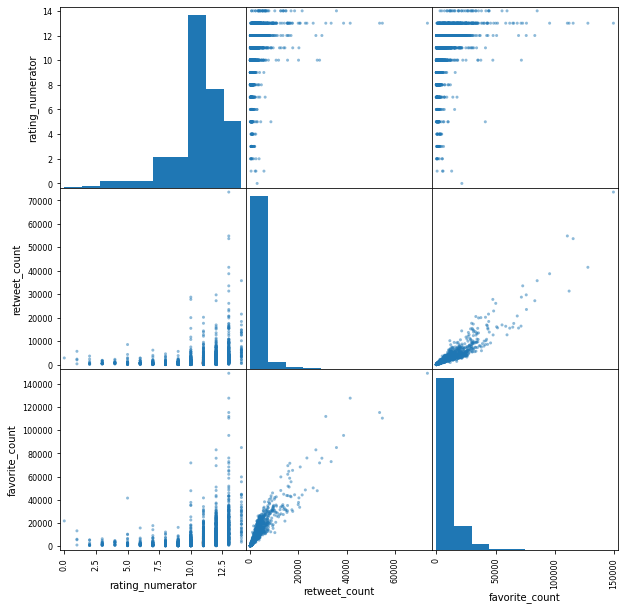

In [201]:
pd.plotting.scatter_matrix(df[['rating_numerator','retweet_count','favorite_count']],figsize = (10,10));

### Most twittered dog breeds
An interesting question is, which dog breed is the most twittered breed. This number also should correlate with the popularity of a dog breed is among the population. 

In [310]:
most_twittered_breeds = df[df['dog_breed'] != ''].groupby(by='dog_breed').size().sort_values(ascending = False).iloc[0:9]
most_twittered_breeds = most_twittered_breeds.sort_values(ascending = True)
least_twitterd_breeds = df[df['dog_breed'] != ''].groupby(by='dog_breed').size().sort_values(ascending = False).iloc[-10:-1]
least_twitterd_breeds = least_twitterd_breeds.sort_values(ascending = True)

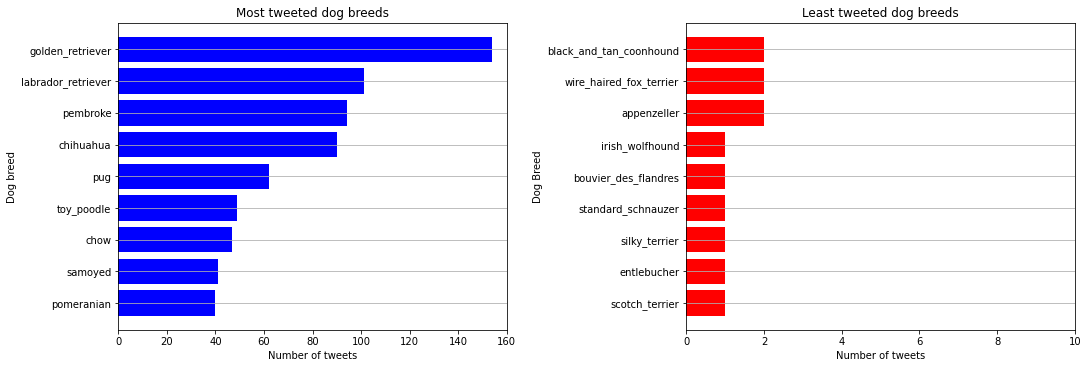

In [311]:
# Visualize the data
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (15,5))

x0 = most_twittered_breeds.index
y0 = most_twittered_breeds
axs[0].barh(x0,y0, color = 'b')
axs[0].set_title('Most tweeted dog breeds')
axs[0].set_xlabel('Number of tweets')
axs[0].set_ylabel('Dog breed')
axs[0].grid(axis='y')
axs[0].set_xlim([0, 160]);

x1 = least_twitterd_breeds.index
y1 = least_twitterd_breeds
axs[1].barh(x1,y1, color='r')
axs[1].set_title('Least tweeted dog breeds')
axs[1].set_xlabel('Number of tweets')
axs[1].set_ylabel('Dog Breed')
axs[1].grid(axis='y')
axs[1].set_xlim([0, 10]);


__Insight 1__: 
For 302 dogs no dog breed could be predicted. As we can see in the diagram above, the most tweeted dog breed is the golden retriever with 154 tweets, followed by the labrador_retriever (101 tweets) and the pembroke (94 tweets). It seems, that retrievers are are the most common dog breed among dog owners.

### Most and least frequent dog names

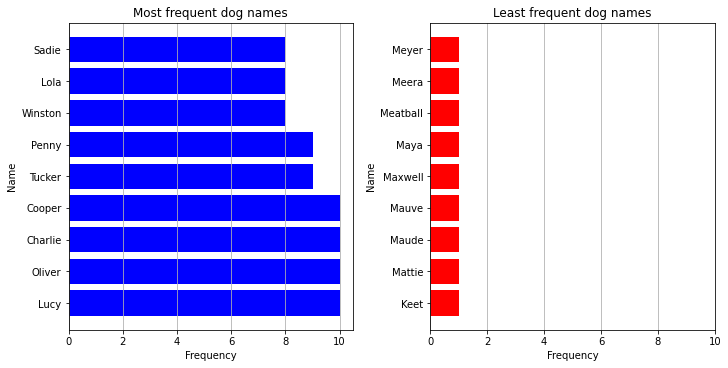

In [301]:
# Visualize the data
most_popular_names = df[df['name'] != 'None'].groupby(by='name').size().sort_values(ascending = False).iloc[0:9]
least_popular_names = df[df['name'] != 'None'].groupby(by='name').size().sort_values(ascending = True).iloc[0:9]
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (10,5))

x0 = most_popular_names.index
y0 = most_popular_names
axs[0].barh(x0,y0, color = 'b')
axs[0].set_title('Most frequent dog names')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Name')
axs[0].grid(axis='x')

x1 = least_popular_names.index
y1 = least_popular_names
axs[1].barh(x1,y1, color = 'r')
axs[1].set_title('Least frequent dog names')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Name')
axs[1].grid(axis='x')
axs[1].set_xlim([0, 10]);

__Insight 2:__  Cooper,Charlie, Oliver and Lucy, are the most common dog names. 

### Correlation between retweets and favorits

In [202]:
import statsmodels.api as sm
import numpy as np

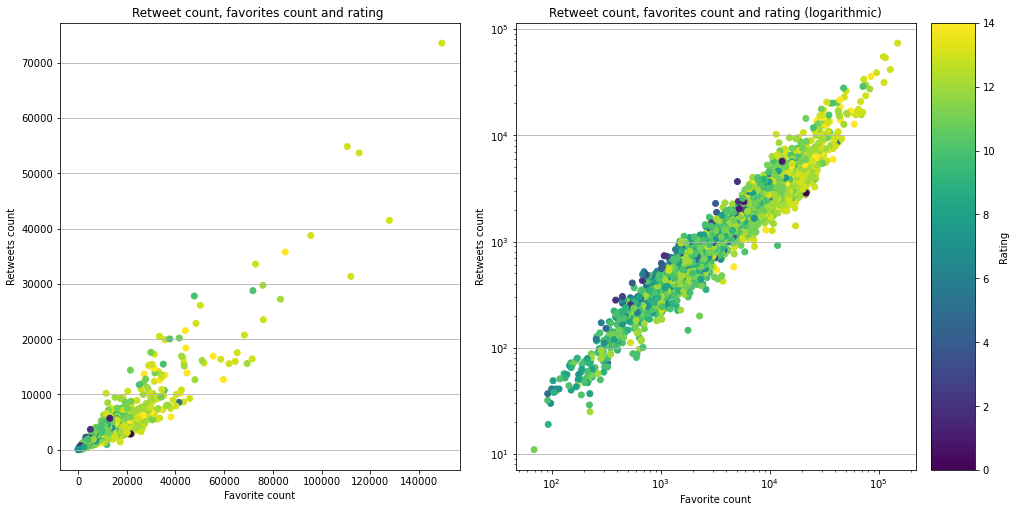

In [364]:
# Visualize the data
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (14,7))

x0 = df.favorite_count
y0 = df.retweet_count
t0 = df.rating_numerator

axs[0].scatter(x0,y0, c = t0, cmap='viridis')
axs[0].set_title('Retweet count, favorites count and rating ')
axs[0].set_xlabel('Favorite count')
axs[0].set_ylabel('Retweets count')
axs[0].grid(axis='y')

axs[1].scatter(x0,y0, c = t0, cmap='viridis')
axs[1].set_title('Retweet count, favorites count and rating (logarithmic)')
axs[1].set_xlabel('Favorite count')
axs[1].set_ylabel('Retweets count')
axs[1].grid(axis='y')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

map1 = ax.imshow(np.stack([t0, t0]),cmap='viridis')
fig.colorbar(map1, ax=axs[1], label = 'Rating');

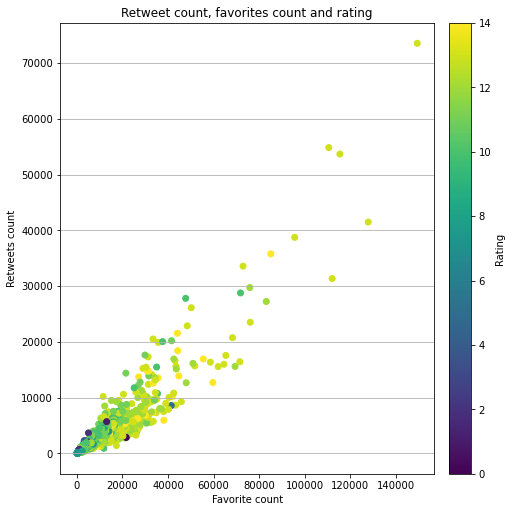

In [361]:
# Visualize the data
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize = (7,7))

x0 = df.favorite_count
y0 = df.retweet_count
t0 = df.rating_numerator
ax1.scatter(x0,y0, c = t0, cmap='viridis')
ax1.set_title('Retweet count, favorites count and rating')
ax1.set_xlabel('Favorite count')
ax1.set_ylabel('Retweets count')
ax1.grid(axis='y')
#ax1.set_yscale('log')
#ax1.set_xscale('log')

map1 = ax.imshow(np.stack([t0, t0]),cmap='viridis')
fig.colorbar(map1, ax=ax1, label = 'Rating');

It seems, as if retweet count and favorite count do correlate with each other. 
Furthermore we can observe, that a high rating correlates with both, a high favorite count and a high retweet count: There is a color change from the bottom left points, where we got ratings of about 8, to the upper left points, where most ratings are 13 or more.

Since we want to determine the correlation between retweets and favorites, we have to get rid of the rows, where the retweet count is not a number. 

In [203]:
df['retweet_count'].isna().sum()

7

We remove the rows, where the retweet count is not a number.

In [204]:
df = df[~df['retweet_count'].isna()]

Build the linear model.

In [206]:
df['intercept'] = 1
lm = sm.OLS(df['retweet_count'], df[['intercept','favorite_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 1.240e+04
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:14:03   Log-Likelihood:                -18195.
No. Observations:                2070   AIC:                         3.639e+04
Df Residuals:                    2068   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -276.0397     42.409     -6.509      0.000    -359.209    -192.870
favorite_count     0.3325      0.003    111.352      0.000       0.327       0.338
==============================================================================
Omnibus:                     1730.520   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179884.244
Skew:                           3.331   Prob(JB):                         0.00
Kurtosis:                      48.180   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Insight 3:__
There is a positive correlation between the retweet count and the favorite count of a tweet. It makes logically sense, that a tweet, that is favored by more users, is also more often retweeted by users. The correlation coefficient $R^2 = 0.857$ indicates, that the correlation is strong.
The coefficients of the intercept is -276 and the coefficient of the favorite counts is 0.3325. The p values of both variables are 0, meaning, they are both statistically significant.

### Most popular dog breed
We will now examine, which dog breed is the most popular. For this, we will create a measure, that represents both, the retweet count and the favorite count. Since one retweet count is on average $0.3325$ favorites, we will weighed a favorite with an factor of $1/0.3325 = 3$. 

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
df_breeds = df[['retweet_count','favorite_count','dog_breed','rating_numerator']].groupby(by='dog_breed').mean()

In [209]:
df_breeds['breed'] = df_breeds.index

In [210]:
df_breeds['popularity'] = df_breeds['retweet_count'] + df_breeds['favorite_count']/0.3325

Plot the 10 most and least popular dogs breeds

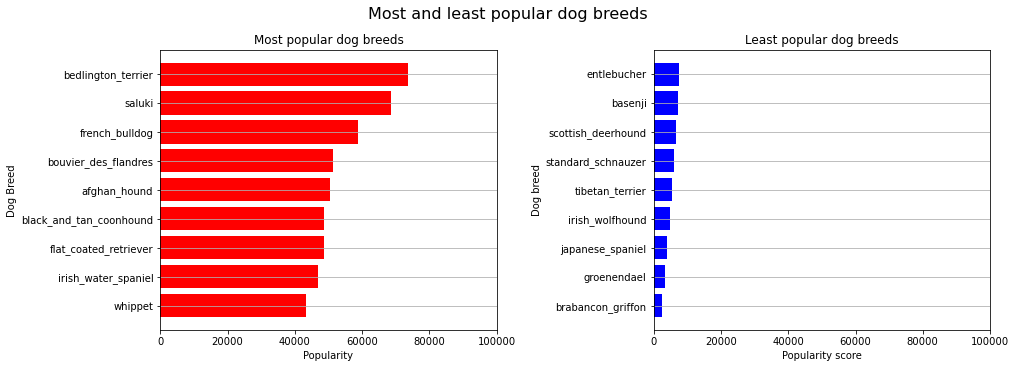

In [339]:
df_most_popular_breeds = df_breeds.sort_values(by = 'popularity', ascending = False).iloc[0:9]
df_most_popular_breeds = df_most_popular_breeds.sort_values(by = 'popularity', ascending = True)
df_least_popular_breeds = df_breeds.sort_values(by = 'popularity', ascending = True).iloc[0:9]

fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (14,5))

x0 = df_most_popular_breeds['breed']
y0 = df_most_popular_breeds['popularity']
axs[0].barh(x0,y0, color = 'r')
axs[0].set_title('Most popular dog breeds')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Dog Breed')
axs[0].grid(axis='y')
axs[0].set_xlim([0, 100000]);

x1 = df_least_popular_breeds['breed']
y1 = df_least_popular_breeds['popularity']
axs[1].barh(x1,y1, color = 'blue')
axs[1].set_title('Least popular dog breeds')
axs[1].set_xlabel('Popularity score')
axs[1].set_ylabel('Dog breed')
axs[1].grid(axis='y')
axs[1].set_xlim([0, 100000]);
fig.suptitle('Most and least popular dog breeds', fontsize=16)
plt.show()

__Insight 4:__
Following our measure of popularity we can state, that the three
* most popularityr dog breeds are bedingtion terrier, saluki and french bulldog
* least popular dog breedsds are brabancon griffon, groenendael and japanese spaniel

### Most popular dog stage

In [212]:
df_category = df.groupby(by='dog_category').mean()

In [243]:
df_category

,rating_numerator,rating_denominator,retweet_count,favorite_count,intercept,popularity,category
dog_category,,,,,,,
,10.510870,10.0,2253.987414,7719.524600,1.0,25470.602751,
doggo,11.830986,10.0,5727.788732,16832.816901,1.0,56352.801970,doggo
floofer,11.888889,10.0,3457.444444,9686.000000,1.0,32588.271512,floofer
pupper,10.735160,10.0,2090.136986,6445.146119,1.0,21474.035088,pupper
puppo,12.000000,10.0,5619.652174,20128.043478,1.0,66155.121281,puppo


In [214]:
df_category['popularity'] = df_category['retweet_count'] + df_category['favorite_count']/0.3325
df_category['category'] = df_category.index

In [215]:
df_category

,rating_numerator,rating_denominator,retweet_count,favorite_count,intercept,popularity,category
dog_category,,,,,,,
,10.510870,10.0,2253.987414,7719.524600,1.0,25470.602751,
doggo,11.830986,10.0,5727.788732,16832.816901,1.0,56352.801970,doggo
floofer,11.888889,10.0,3457.444444,9686.000000,1.0,32588.271512,floofer
pupper,10.735160,10.0,2090.136986,6445.146119,1.0,21474.035088,pupper
puppo,12.000000,10.0,5619.652174,20128.043478,1.0,66155.121281,puppo


In [216]:
df_sorted_categories

,rating_numerator,rating_denominator,retweet_count,favorite_count,intercept,popularity,category
dog_category,,,,,,,
puppo,12.000000,10.0,5619.652174,20128.043478,1.0,66155.121281,puppo
doggo,11.830986,10.0,5727.788732,16832.816901,1.0,56352.801970,doggo
floofer,11.888889,10.0,3457.444444,9686.000000,1.0,32588.271512,floofer
,10.510870,10.0,2253.987414,7719.524600,1.0,25470.602751,
pupper,10.735160,10.0,2090.136986,6445.146119,1.0,21474.035088,pupper


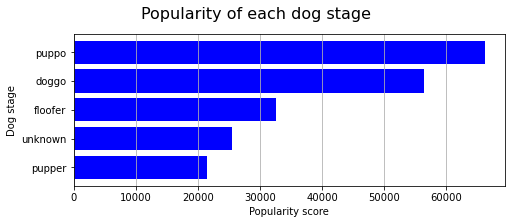

In [338]:
df_sorted_categories = df_category.sort_values(by = 'popularity', ascending = True)
df_sorted_categories = df_sorted_categories.rename( index={'': 'unknown'})
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize = (7,3))

x0 = df_sorted_categories.index
y0 = df_sorted_categories['popularity']
ax.barh(x0,y0, color = 'b')
ax.set_xlabel('Popularity score')
ax.set_ylabel('Dog stage')
ax.grid(axis='x')
fig.suptitle('Popularity of each dog stage', fontsize=16)

plt.show()

__Insight 5:__
The most most popular dog category is puppo, followed by doggo, floofer, uncategorized and pupper. Uncategorized means, that the dog category could not be assigned.